In [246]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [247]:
# from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [248]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Review Data

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [250]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [251]:
# number of missing values in each column
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [252]:
# check if there are any duplicate rows 
df.duplicated().sum()

np.int64(0)

/tmp/ipykernel_21244/3802390234.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MINIMUM_PAYMENTS'], bins=30, kde=False, color='red')


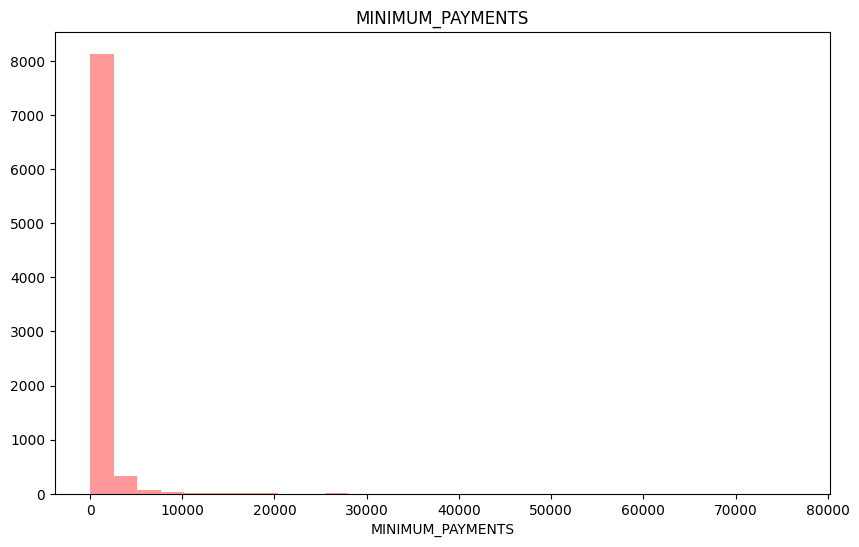

In [253]:
# vissualize the MINIMUM_PAYMENTS
plt.figure(figsize=(10,6))
sns.distplot(df['MINIMUM_PAYMENTS'], bins=30, kde=False, color='red')
plt.title('MINIMUM_PAYMENTS')
plt.show()

In [254]:
# drop the CUST_ID column
df.drop('CUST_ID', axis=1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


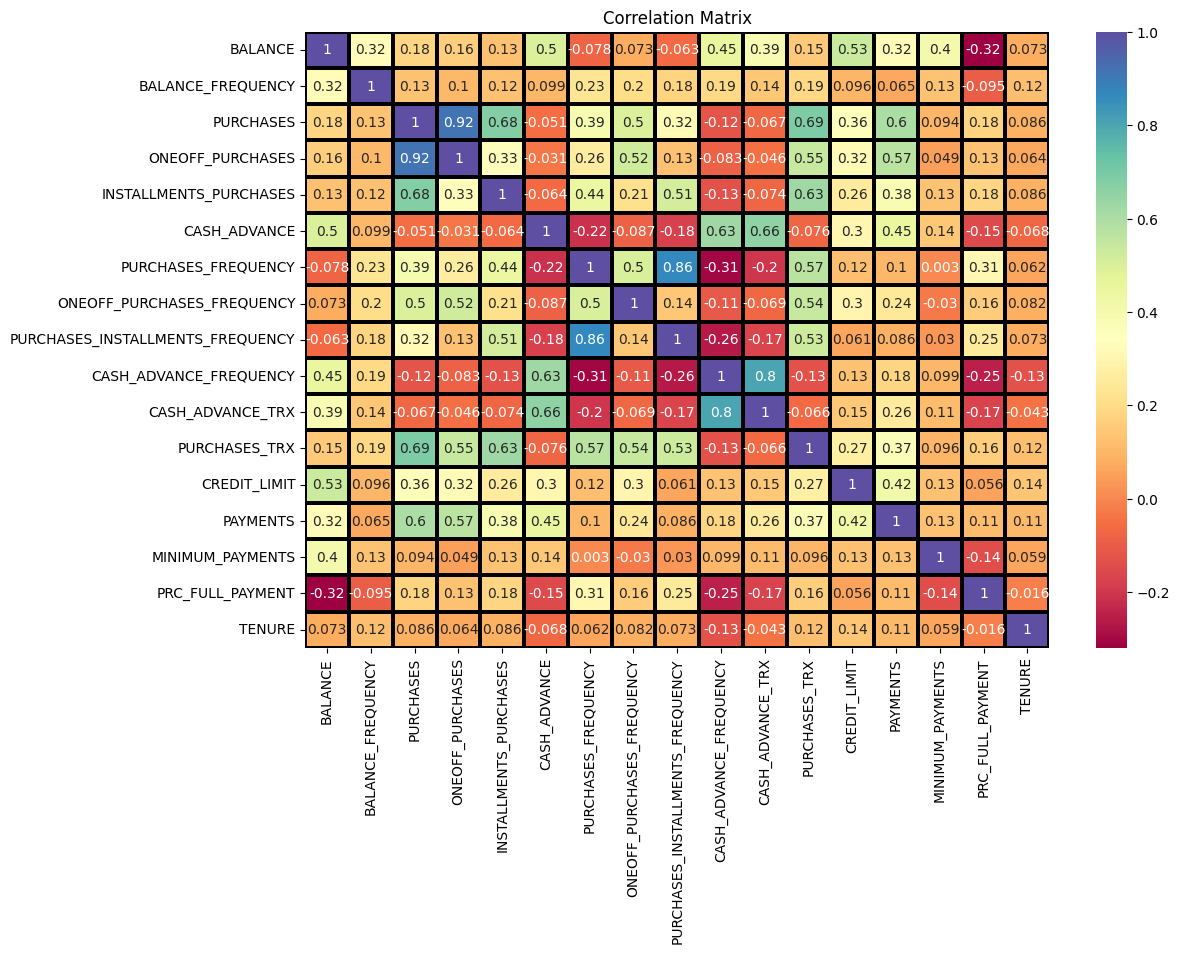

In [255]:
# correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', linewidths=1.5, linecolor='black')
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'MINIMUM_PAYMENTS vs. BALANCE')

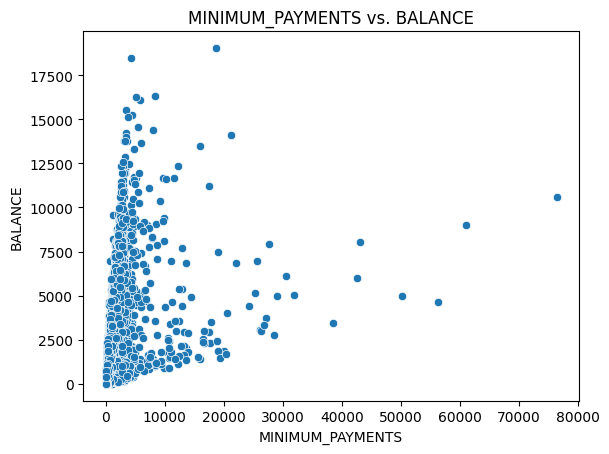

In [256]:
# Scatter plot of MINIMUM_PAYMENTS vs. Balance
sns.scatterplot(x='MINIMUM_PAYMENTS', y='BALANCE', data=df)
plt.title('MINIMUM_PAYMENTS vs. BALANCE')


Text(0.5, 1.0, 'MINIMUM_PAYMENTS vs. ONEOFF_PURCHASES')

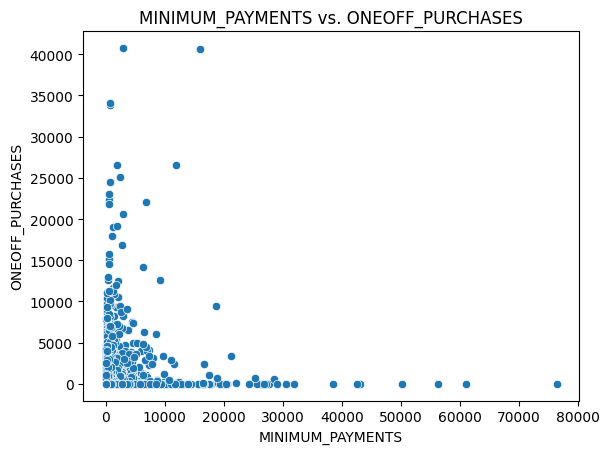

In [257]:
## Scatter plot of MINIMUM_PAYMENTS vs. one_off_purchases
sns.scatterplot(x='MINIMUM_PAYMENTS', y='ONEOFF_PURCHASES', data=df)
plt.title('MINIMUM_PAYMENTS vs. ONEOFF_PURCHASES')


/tmp/ipykernel_21244/4062474830.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MINIMUM_PAYMENTS'], bins=30, kde=False, color='red')


Text(0.5, 1.0, 'MINIMUM_PAYMENTS')

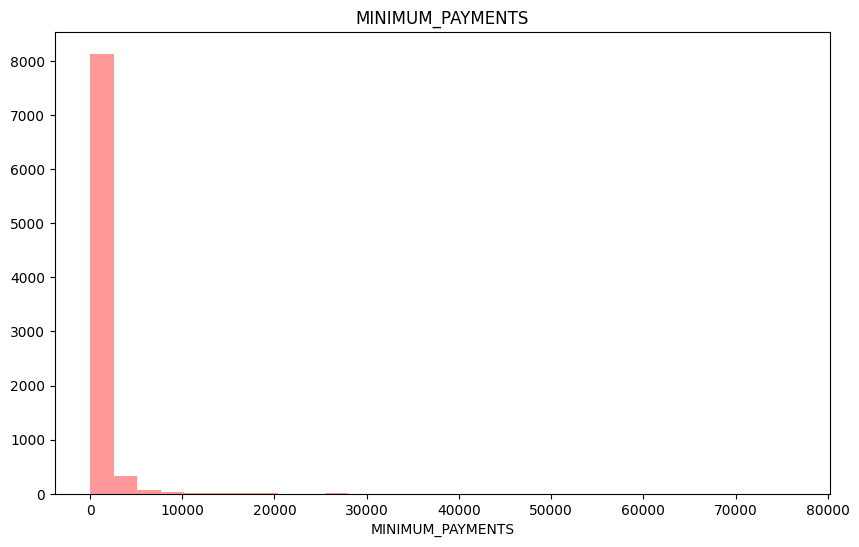

In [258]:
# Log transformation of the minimum payments

# plot the MINIMUM_PAYMENTS after log transformation
plt.figure(figsize=(10,6))
sns.distplot(df['MINIMUM_PAYMENTS'], bins=30, kde=False, color='red')
plt.title('MINIMUM_PAYMENTS')

/tmp/ipykernel_21244/2070845550.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MINIMUM_PAYMENTS'], bins=30, kde=True, color='red')


Text(0.5, 1.0, 'MINIMUM_PAYMENTS_log')

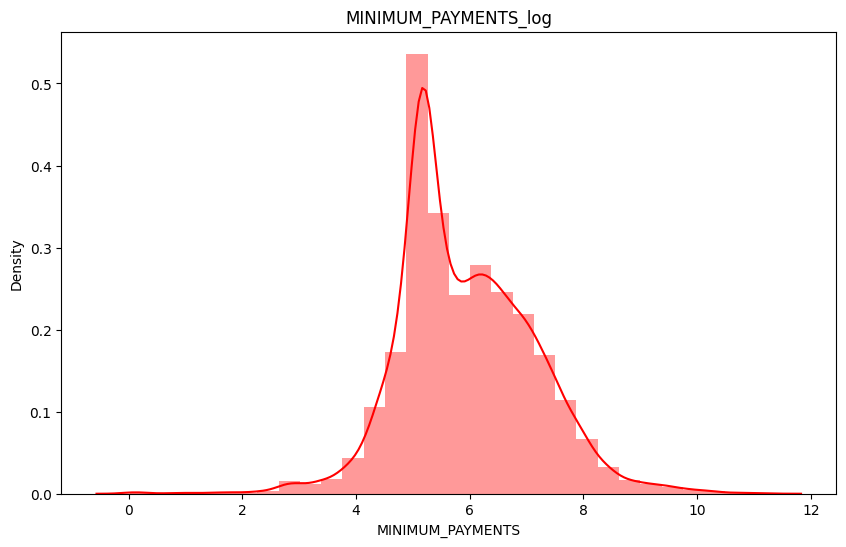

In [259]:
# Log transformation of the minimum payments
df['MINIMUM_PAYMENTS'] = np.log1p(df['MINIMUM_PAYMENTS'])

# plot the MINIMUM_PAYMENTS after log transformation
plt.figure(figsize=(10,6))
sns.distplot(df['MINIMUM_PAYMENTS'], bins=30, kde=True, color='red')
plt.title('MINIMUM_PAYMENTS_log')

In [260]:
df 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,4.945277,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,6.978531,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,6.442994,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,5.504483,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,3.909748,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,4.423869,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,4.038755,0.250000,6


In [261]:
df['MINIMUM_PAYMENTS'].isnull().sum()

np.int64(313)

In [262]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)

df.isnull().sum()

/tmp/ipykernel_21244/3495209718.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
/tmp/ipykernel_21244/3495209718.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [263]:
# Standardize the data

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.83538484,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.90329658,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ...,  0.44534652,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -1.28125319,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -1.61057269,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -1.22309692,
        -0.52555097, -4.12276757]], shape=(8950, 17))

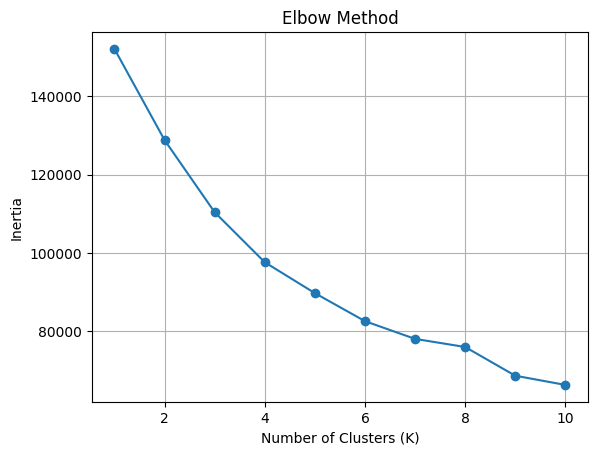

In [264]:
from sklearn.cluster import KMeans
inertia = []
k_range = range(1, 11)  # Try clustering with 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values for different k values
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

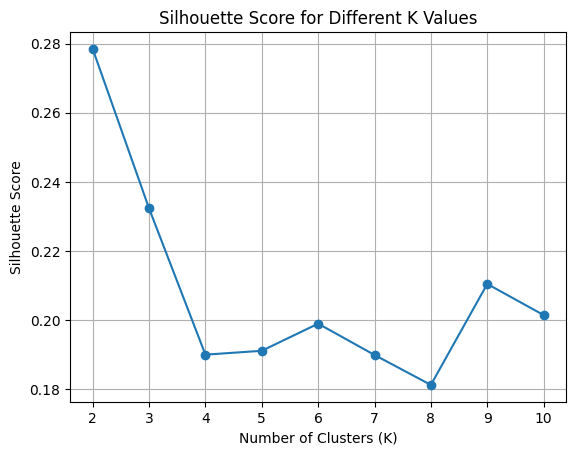

Optimal K (based on silhouette score): 2


In [265]:
# Evaluate Silhouette Scores for different K values
from sklearn.metrics import silhouette_score
sil_scores = []
k_range = range(2, 11)  # Start from 2 because silhouette score is not defined for 1 cluster

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sil_score = silhouette_score(df_scaled, kmeans.labels_)
    sil_scores.append(sil_score)

# Plot silhouette scores for different k values
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.grid(True)
plt.show()

# Print the highest silhouette score and corresponding K
best_k = k_range[np.argmax(sil_scores)]
print(f"Optimal K (based on silhouette score): {best_k}")

In [270]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca_1 = PCA(n_components=0.95)
df_pca_1 = pca_1.fit_transform(df_scaled)


In [271]:
df_pca_1.shape

(8950, 12)

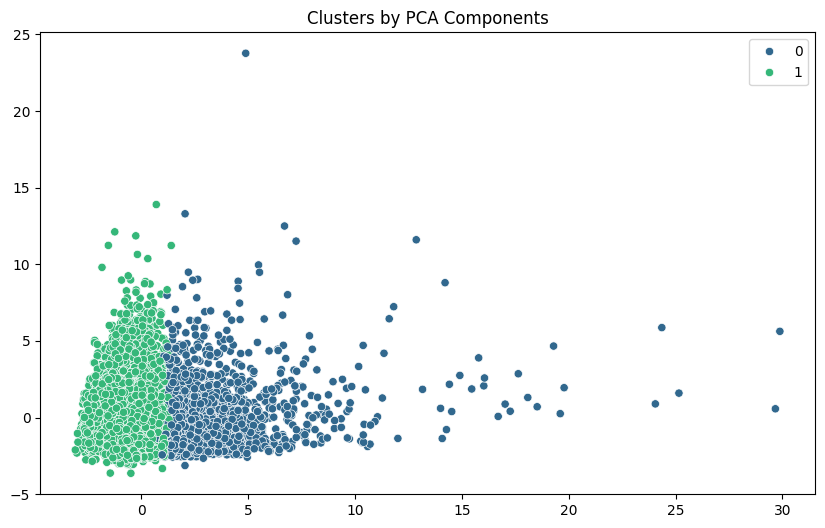

In [272]:
# KMeans clustering with the optimal K
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(df_pca_1)


# visualize the clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x=df_pca_1[:,0], y=df_pca_1[:,1], hue=kmeans.labels_, palette='viridis', legend='full')
plt.title('Clusters by PCA Components')
plt.show()


In [273]:
# calculate solhouette score
silhouette_score(df_pca_1, kmeans.labels_)


np.float64(0.2829519562973604)

In [274]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)




In [275]:
df_pca.shape

(8950, 2)

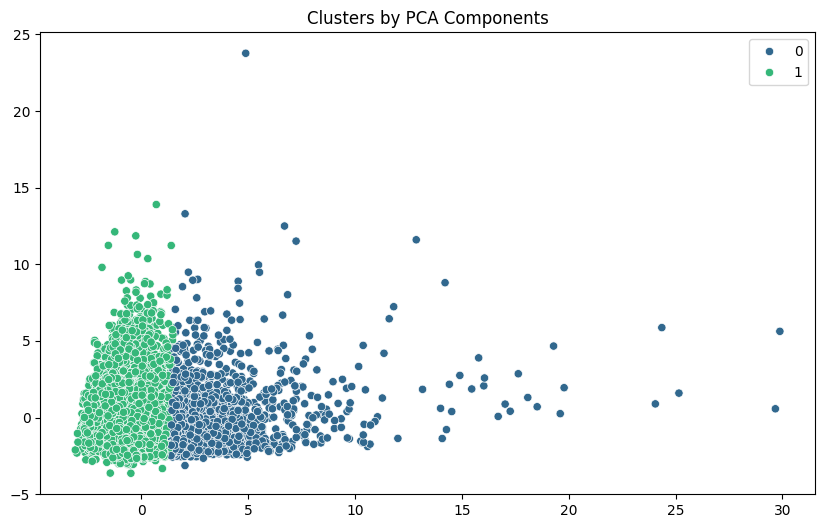

In [276]:
# KMeans clustering with the optimal K
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(df_pca)


# visualize the clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=kmeans.labels_, palette='viridis', legend='full')
plt.title('Clusters by PCA Components')
plt.show()


In [277]:
# calculate solhouette score
silhouette_score(df_pca, kmeans.labels_)



np.float64(0.4468661046671887)

In [158]:
# df_log['MINIMUM_PAYMENTS'].isnull().sum()

In [159]:
# # return the log transformation to the original scale

# df_after_log = np.expm1(df_log)

In [160]:
# # Log transformation of the minimum payment
# # plot the MINIMUM_PAYMENTS after log transformation
# plt.figure(figsize=(10,6))
# sns.distplot(df['MINIMUM_PAYMENTS'], bins=30, kde=True, color='red')
# # plt.title('MINIMUM_PAYMENTS')

In [161]:
# # Using the impuation method to fill the missing values
# imputer = SimpleImputer(strategy='mean')

# df['MINIMUM_PAYMENTS'] = imputer.fit_transform(df[['MINIMUM_PAYMENTS']])


In [163]:
# df['MINIMUM_PAYMENTS'] = np.log1p(df['MINIMUM_PAYMENTS'])
# df.head()

In [207]:
## Plot silhouette score.

px.line(x = np.arange(2, k + 1),\
        y = ,\
        markers = True,\
        title = 'silhouette_scores vs Number of Clusters',\
        labels = {'x': 'number of clusters', 'y': 'silhouette_score'},\
        range_y = [0, silhouette_scores])

NameError: name 'px' is not defined

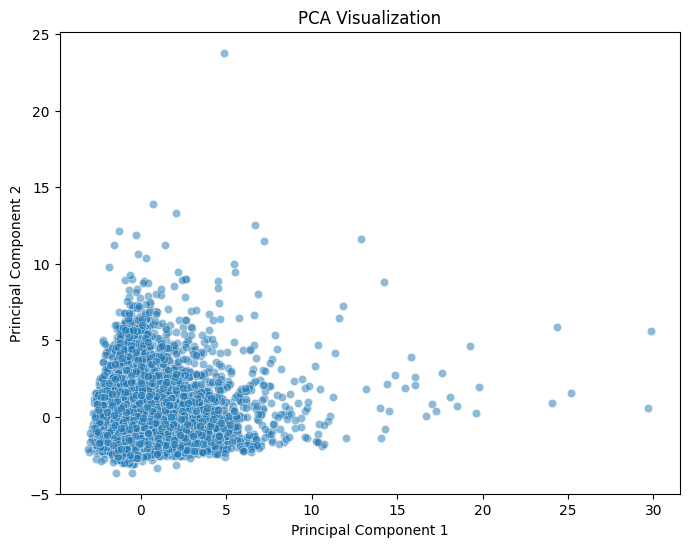

Explained Variance Ratio: [0.27397395 0.22127921]


In [202]:
# 3️⃣ Apply PCA (reduce to 2D for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# 4️⃣ Create a DataFrame for visualization
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# 5️⃣ Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.show()

# 6️⃣ Explained Variance (How much info each PC captures)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)